# Visualization of Phase-Picks at NCI on ISC Events 


##  Fei Zhang
### October 2018

View seismic events, stations, and rays



In [1]:
import sys
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt

In [2]:
# get the pst packages into PYTHONPATH 
# sys.path.append("/Softlab/Githubz/passive-seismic")  

#from seismic.cluster.cluster import Grid2 
#from seismic.traveltime.sort_rays import sort,sort2

In [3]:
def csv2pdf(csvfile):
    """
    Read in a csv file into a pandas dataframe. 
    Make sure the column names match the csv files. 
    delimiter/separator is whitespace or comma
    """
   
   
    
    # read infile, tweek below
    in_pdf =  pd.read_csv(csvfile, header='infer')   #  assume there is header line=0; separator = comma,
    # finalpdf =  pd.read_csv(csvfile, header=None,  names=col_names ) #  no header line, separator = comma,
    #in_pdf =  pd.read_csv(csvfile,  sep='\s+', header='infer') # white space
  
    # columns you are interested?
    col_names=['source_block', 'station_block', 'residual', 'event_number', 
            'source_longitude','source_latitude','source_depth',  
            'station_longitude','station_latitude', 'observed_tt', 'locations2degrees', 'station_code','SNR', 'P_or_S']   
    
    # finalpdf = in_pdf[col_names]  # take a subset of columns
    
    return in_pdf  #pandas_data_frame

In [4]:
# OR read in from already sorted (zoned) csv file
#inputcsv ='/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_S.csv'
#inputcsv ='/Softlab/travel_time_tomography/CSV_Data/engdahl/outfile_S.csv'


inputcsv='/g/data1a/ha3/fxz547/travel_time_tomography/create_input4inversion/s_arrivals_mag_4_and_above_sorted2x2.CSV'


inputpdf = csv2pdf(inputcsv)

In [5]:
inputpdf.shape

(105399, 24)

In [6]:
inputpdf.head()

,#eventID,originTimestamp,mag,source_lon,source_lat,source_depth_km,net,sta,cha,pickTimestamp,...,tt_residual,snr,bandIndex,source_block,station_block,observed_tt,locations_to_degrees,my_azim,my_bazim,ellipticity_corr
0,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GT,PLCA,00T,1.250783e+09,...,-9.258177,83.7,1,3381,1951858,1366.371854,81.982351,156.971438,197.836414,-0.533146
1,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GT,LBTB,00T,1.250783e+09,...,0.007735,123.7,0,3381,1952616,1371.403497,83.301961,235.965939,147.109362,0.323498
2,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GE,GSI,BHZ,1.250783e+09,...,5.325953,21.9,0,3381,1954229,1164.549316,65.314256,311.673019,153.644994,0.349316
3,smi:ISC/evid=603987514,1.378794e+09,4.0,139.6028,-52.1611,0.0,AU,GHSS,SHZ,1.378795e+09,...,7.771818,9.8,0,3561,5090,428.401395,17.256535,357.223707,177.921236,0.101395
4,smi:ISC/evid=603987514,1.378794e+09,4.0,139.6028,-52.1611,0.0,IU,QSPA,00T,1.378795e+09,...,-2.049780,20.0,0,3561,1948920,791.378457,37.768053,179.990202,355.156855,-0.846543


In [7]:
inputpdf.columns


Index(['#eventID', 'originTimestamp', 'mag', 'source_lon', 'source_lat',
       'source_depth_km', 'net', 'sta', 'cha', 'pickTimestamp', 'station_lon',
       'station_lat', 'baz', 'distance', 'tt_residual', 'snr', 'bandIndex',
       'source_block', 'station_block', 'observed_tt', 'locations_to_degrees',
       'my_azim', 'my_bazim', 'ellipticity_corr'],
      dtype='object')

In [8]:
# write out ?
# finalpdf.to_csv('/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_P2.csv', header=True, index=False, sep=',')

In [9]:
inputpdf[['distance','locations_to_degrees' ]].head(10)

,distance,locations_to_degrees
0,82.332581,81.982351
1,83.528121,83.301961
2,65.183917,65.314256
3,17.250461,17.256535
4,37.954174,37.768053
5,54.149553,53.926798
6,36.336449,36.415256
7,71.772928,71.606888
8,37.013843,37.037316
9,42.521345,42.664543


# Begin to Visualize the data

In [10]:
#  which dataframe to view in the following??
pdf2= inputpdf  #sorted_pdf

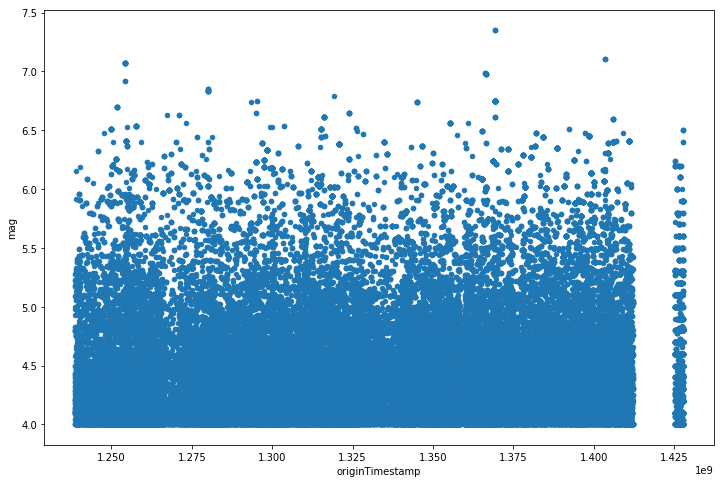

In [11]:


pdf2.plot.scatter(x='originTimestamp', y='mag',figsize=(12,8))

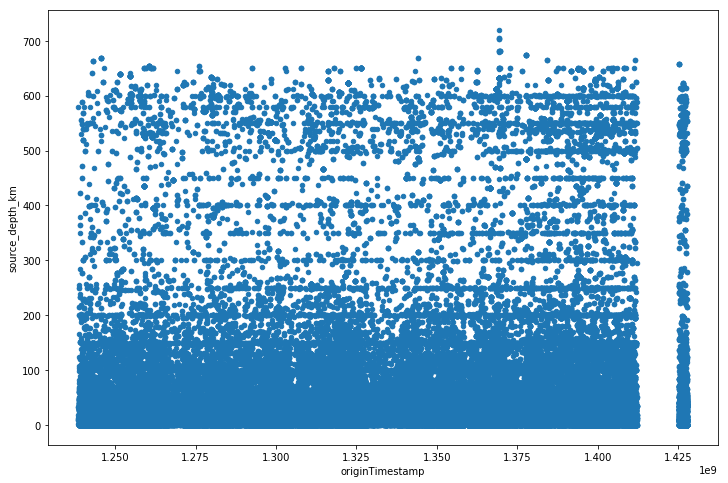

In [12]:
pdf2.plot.scatter(x='originTimestamp', y='source_depth_km',figsize=(12,8))


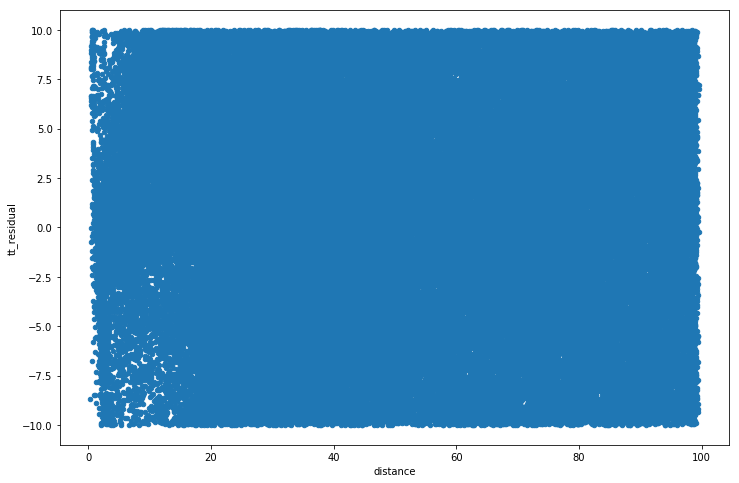

In [13]:
#plt.figure(); 
#pdf2.plot.scatter(x='locations2degrees', y='observed_tt',figsize=(12,8))

#pdf2.plot.scatter(x='dist', y='ttResidual',figsize=(12,8))
pdf2.plot.scatter(x='distance', y='tt_residual',figsize=(12,8))

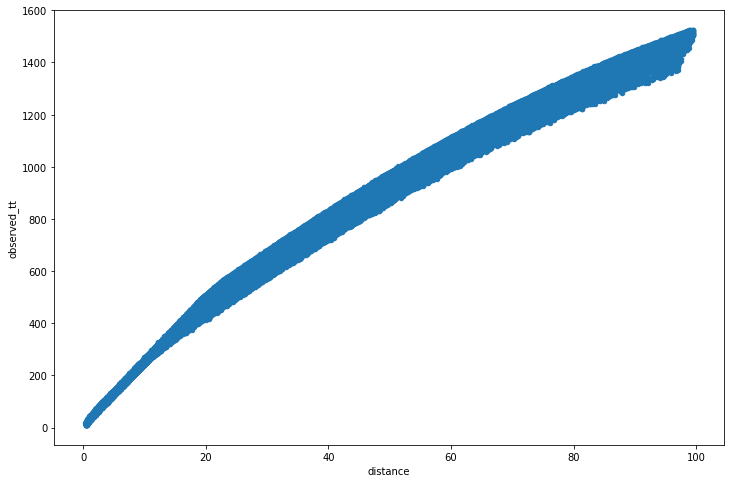

In [14]:
# pdf2['observed_tt'] = pdf2.pickTimestamp - pdf2.originTimestamp

pdf2.plot.scatter(x='distance', y='observed_tt',figsize=(12,8))

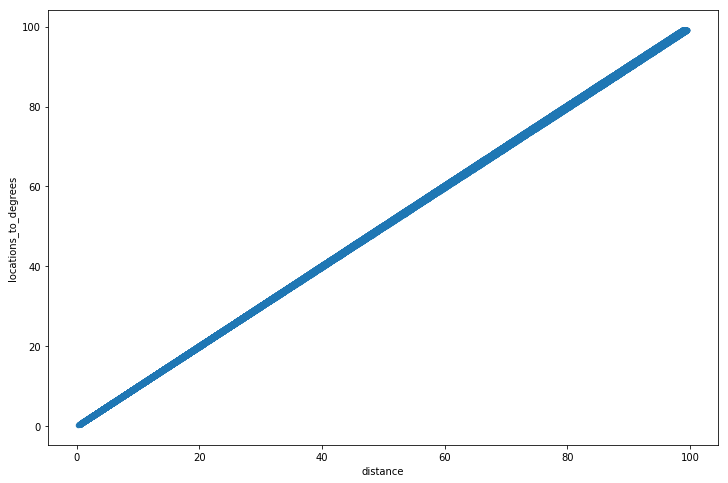

In [15]:
pdf2.plot.scatter(x='distance', y='locations_to_degrees',figsize=(12,8))
#locations_to_degrees,bak_azim,ellipticity_corr

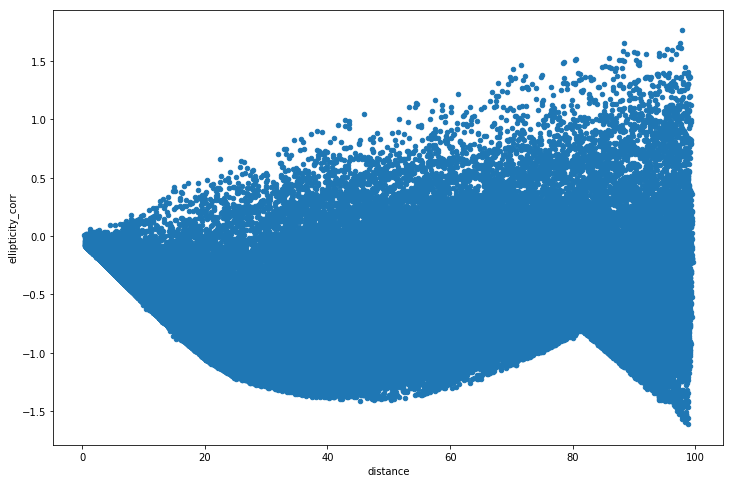

In [16]:
pdf2.plot.scatter(x='distance', y='ellipticity_corr',figsize=(12,8))
#locations_to_degrees,bak_azim,ellipticity_corr

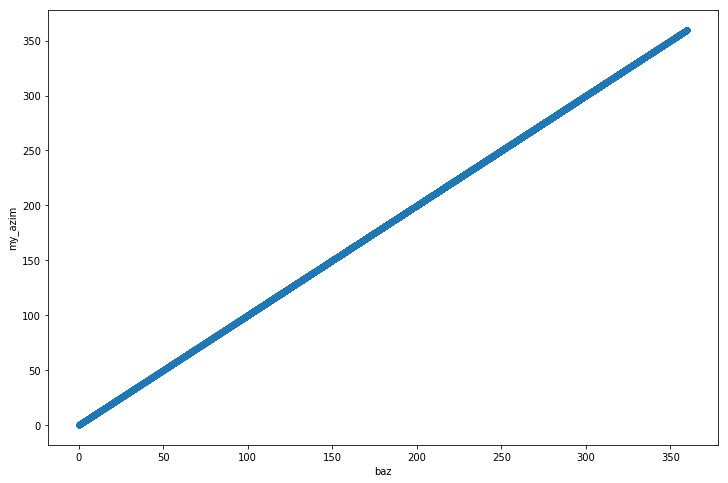

In [17]:
pdf2.plot.scatter(x='baz', y='my_azim',figsize=(12,8))
#locations_to_degrees,,ellipticity_corr

In [18]:
pdf2[['baz', 'my_azim']].head()

,baz,my_azim
0,156.900251,156.971438
1,236.102959,235.965939
2,311.734998,311.673019
3,357.224945,357.223707
4,179.990190,179.990202


In [19]:
# How many events with very shallow depth(KM)?
pdf2[pdf2.source_depth_km<0.1].shape


(8386, 24)

In [20]:

pdf2['source_depth_km'].max()

720.2

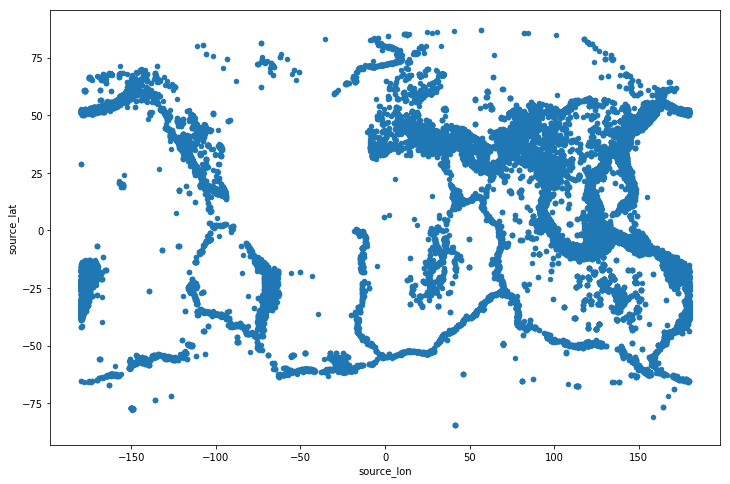

In [21]:
max_blockn = 1948861   #param2x2
max_blockn = 7795441  # param1x1

pdf2region = pdf2[pdf2.source_block <= max_blockn]
pdf2region.plot.scatter(x='source_lon', y='source_lat',figsize=(12,8))

In [22]:
print(pdf2region['source_lon'].min(),pdf2region['source_lon'].max())
print(pdf2region['source_lat'].min(),pdf2region['source_lat'].max())

-179.9995 179.9989
-84.4085 87.0272


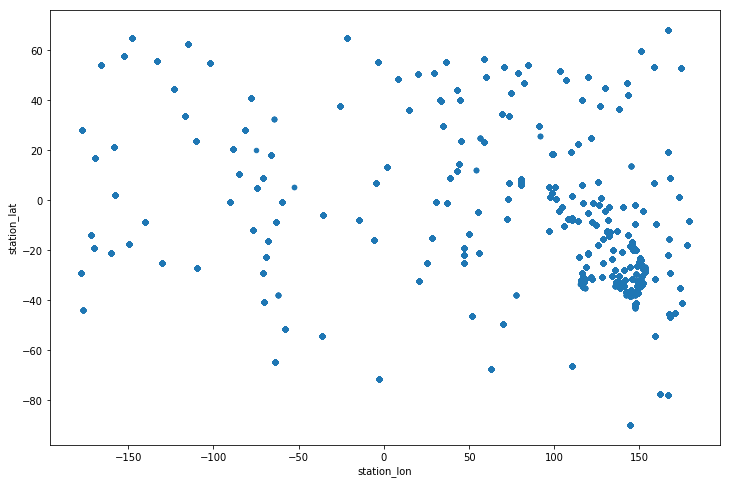

In [23]:
pdf2region = pdf2[pdf2.station_block <= max_blockn]
pdf2region.plot.scatter(x='station_lon', y='station_lat',figsize=(12,8))


In [24]:
print(pdf2region['station_lon'].min(),pdf2region['station_lon'].max())
print(pdf2region['station_lat'].min(),pdf2region['station_lat'].max())

-177.929 179.1966
-89.9289 68.0653


# 1. Python Pandas package plot function (with basemap) 

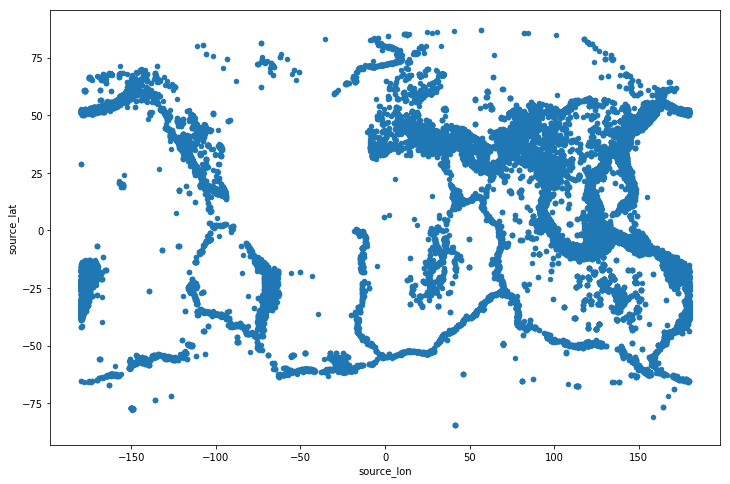

In [25]:
#plt.figure(); 
pdf2.plot.scatter(x='source_lon', y='source_lat',figsize=(12,8))

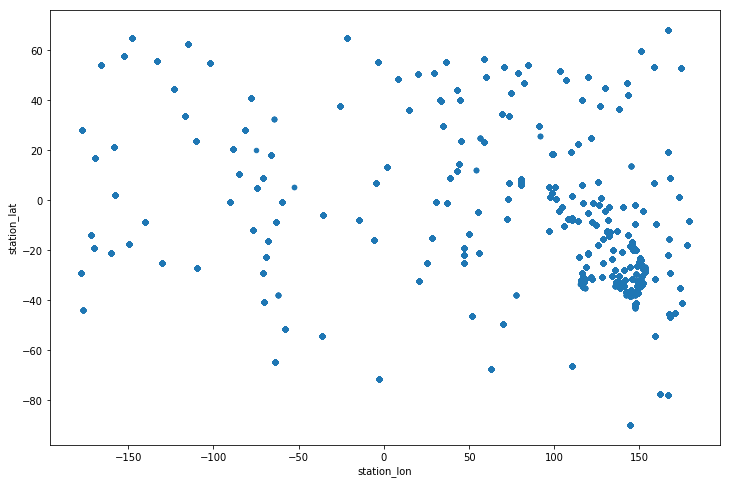

In [26]:
pdf2.plot.scatter(x='station_lon', y='station_lat',figsize=(12,8))

# 3. Geopandas and Maps

In [27]:
import geopandas as gpd

In [28]:
from shapely.geometry import mapping
from shapely.geometry import Point
from shapely.geometry import Point, Polygon, LineString, LinearRing

In [29]:
event_locations = [Point(xy) for xy in zip(pdf2.source_lon, pdf2.source_lat)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry=event_locations)

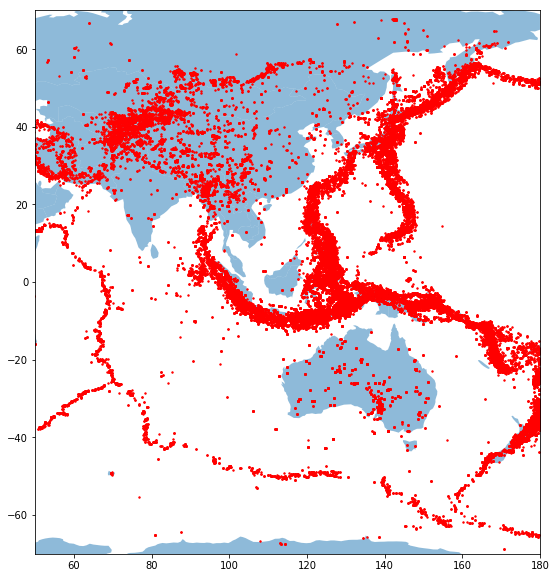

In [30]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

myax.set_xlim([50,180])
myax.set_ylim([-70,70])
              
myax2=geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

In [31]:
station_locations = [Point(xy) for xy in zip(pdf2.station_lon, pdf2.station_lat)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf['station'] =station_locations

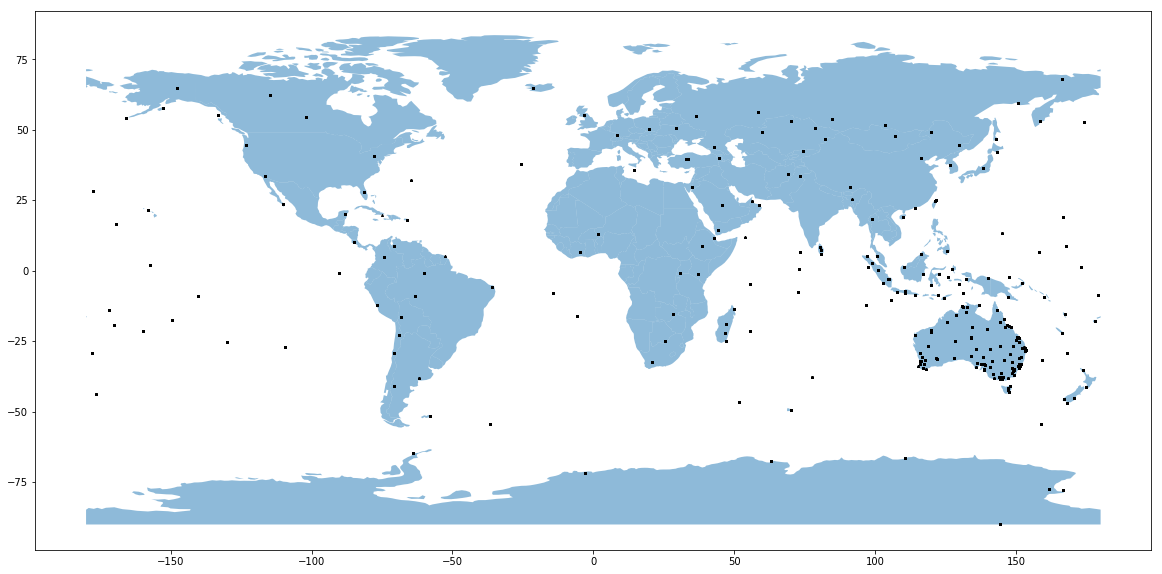

In [32]:
# geopdf.plot(ax=myax2, marker='o', color='red', markersize=2)
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 20))

# myax.set_xlim([-180,180])
# myax.set_ylim([-70,70])
              
geopdf.set_geometry('station').plot(ax=myax, marker='^', color='black', markersize=4);
#geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

In [33]:
geopdf.geometry.name

'geometry'

In [34]:
geopdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 105399 entries, 0 to 105398
Data columns (total 26 columns):
#eventID                105399 non-null object
originTimestamp         105399 non-null float64
mag                     80869 non-null float64
source_lon              105399 non-null float64
source_lat              105399 non-null float64
source_depth_km         105399 non-null float64
net                     105399 non-null object
sta                     105399 non-null object
cha                     105399 non-null object
pickTimestamp           105399 non-null float64
station_lon             105399 non-null float64
station_lat             105399 non-null float64
baz                     105399 non-null float64
distance                105399 non-null float64
tt_residual             105399 non-null float64
snr                     105399 non-null float64
bandIndex               105399 non-null int64
source_block            105399 non-null int64
station_block           10

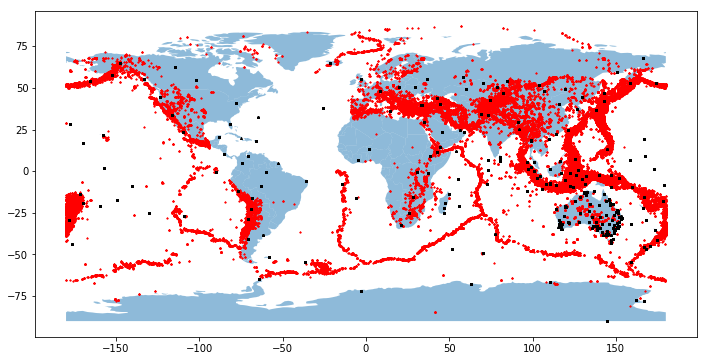

In [35]:
# composing two layers in a map
f, ax = plt.subplots(1, figsize=(12, 6))
# Add layer of polygons on the axis
world.plot(ax=ax, alpha=0.5,  figsize=(20, 20))

geopdf.plot(ax=ax, marker='*', color='red', markersize=2)
geop2= geopdf.set_geometry('station')
geop2.plot(ax=ax, marker='^', color='black', markersize=4)
plt.savefig('Swave_events_stations.png')

# Display
#plt.show()

In [36]:
geopdf.head()

,#eventID,originTimestamp,mag,source_lon,source_lat,source_depth_km,net,sta,cha,pickTimestamp,...,bandIndex,source_block,station_block,observed_tt,locations_to_degrees,my_azim,my_bazim,ellipticity_corr,geometry,station
0,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GT,PLCA,00T,1.250783e+09,...,1,3381,1951858,1366.371854,81.982351,156.971438,197.836414,-0.533146,POINT (140.2239 -53.6383),POINT (-70.55083 -40.73277)
1,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GT,LBTB,00T,1.250783e+09,...,0,3381,1952616,1371.403497,83.301961,235.965939,147.109362,0.323498,POINT (140.2239 -53.6383),POINT (25.59665 -25.0151)
2,smi:ISC/evid=16104437,1.250782e+09,4.1,140.2239,-53.6383,0.0,GE,GSI,BHZ,1.250783e+09,...,0,3381,1954229,1164.549316,65.314256,311.673019,153.644994,0.349316,POINT (140.2239 -53.6383),POINT (97.57550000000001 1.3039)
3,smi:ISC/evid=603987514,1.378794e+09,4.0,139.6028,-52.1611,0.0,AU,GHSS,SHZ,1.378795e+09,...,0,3561,5090,428.401395,17.256535,357.223707,177.921236,0.101395,POINT (139.6028 -52.1611),POINT (138.6017 -34.9194)
4,smi:ISC/evid=603987514,1.378794e+09,4.0,139.6028,-52.1611,0.0,IU,QSPA,00T,1.378795e+09,...,0,3561,1948920,791.378457,37.768053,179.990202,355.156855,-0.846543,POINT (139.6028 -52.1611),POINT (144.4382 -89.9289)


In [37]:
# output required csv txt file for inversion program

phase='P'
final_df=pdf2

if phase =='P':
    final_df['P_or_S'] =1
elif phase =='S':
    final_df['P_or_S'] = 2
else:
    raise Exception("Phase must be P or S !!!")
    
final_df['event_number'] = final_df.apply(lambda x: int(x.originTimestamp), axis=1)


required_columns = ['source_block', 'station_block', 'tt_residual', 'event_number',
             'source_lon', 'source_lat', 'source_depth_km',
             'station_lon', 'station_lat', 'observed_tt', 'locations_to_degrees',  'P_or_S']


pdf4inv = final_df[required_columns]

inv_txt = "%s.inv_txt" % 'outputcsv'
pdf4inv.to_csv(inv_txt,header=False, index=False, sep=' ')  # space delimitted txt file


In [38]:
!head outputcsv.inv_txt

3381 1951858 -9.258177 1250781719 140.2239 -53.6383 0.0 -70.55083 -40.73277 1366.3718539476395 81.98235129117168 1
3381 1952616 0.007735 1250781719 140.2239 -53.6383 0.0 25.59665 -25.0151 1371.4034974873066 83.30196085386929 1
3381 1954229 5.325953 1250781719 140.2239 -53.6383 0.0 97.5755 1.3039 1164.549315571785 65.3142564234172 1
3561 5090 7.771818 1378794137 139.6028 -52.1611 0.0 138.6017 -34.9194 428.4013950228691 17.256535197797255 1
3561 1948920 -2.04978 1378794137 139.6028 -52.1611 0.0 144.4382 -89.9289 791.3784565925598 37.768053451415355 1
3561 1951331 3.579036 1378794137 139.6028 -52.1611 0.0 51.855308 -46.43096 1018.7654489427803 53.92679752101561 1
3627 6790 -8.603401 1298421129 115.6055 -50.5111 0.0 128.7627 -15.6769 778.4158997386694 36.4152559552712 1
3628 1952616 -2.358434 1249746328 116.9289 -51.035 0.0 25.59665 -25.0151 1247.1463638544085 71.6068877724757 1
3707 6435 0.540443 1301886100 106.4638 -49.598 0.0 134.36238 -19.946861 778.76413834095 37.03731567698698 1
3711

In [39]:
# stop

# Plot Arrival Rays (takes a few minutes to run)

In [40]:
pdf3 = pdf2.loc[(pdf2.source_block <= max_blockn) & (pdf2.station_block <= max_blockn) ]
mycrs = {'init': 'epsg:4326'}  # WGS84

#geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

pdf3['ray']= pdf3.apply(lambda x: LineString([(x.source_lon, x.source_lat), 
                (x.station_lon, x.station_lat)]), axis=1)


geopdf_ray = gpd.GeoDataFrame(pdf3, crs=mycrs, geometry='ray')

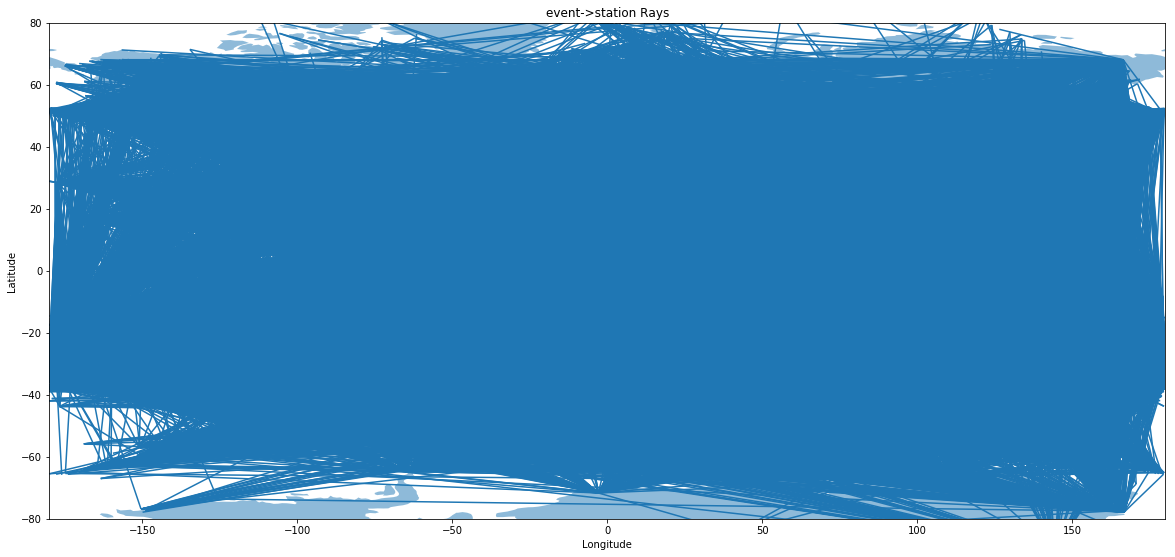

In [41]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mymap=world.plot(alpha=0.5,  figsize=(20, 20))

mymap.set_xlim([-180,180])
mymap.set_ylim([-80,80])

# mymap.set_xlim([50,180])
# mymap.set_ylim([-70,70])

mymap.set_xlabel('Longitude')
mymap.set_ylabel('Latitude')
title_str= "event->station Rays"
mymap.set_title(title_str)

geopdf_ray.plot(ax=mymap)

In [42]:
geopdf_ray.shape

(105399, 29)